# TP 03 RCR2:
## Réseaux Bayésiens

In [19]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import matplotlib.pyplot as plt
import networkx as nx

## Genetics (G):

- Description: Represents the genetic factors of a patient.
- Influence on: Disease.
- Note: Genetic factors play a role in determining the likelihood of developing a disease.
## Lifestyle (L):

- Description: Reflects the patient's lifestyle choices.
- Influence on: Disease.
- Note: Certain lifestyle choices can impact the risk of developing specific diseases.
## Medical History (MH):

- Description: Represents the patient's medical history.
- Influence on: Disease.
- Note: Previous medical conditions may affect the susceptibility to certain diseases.
## Environmental Factors (EF):

- Description: Captures environmental influences on health.
- Influence on: Disease.
- Note: External factors, such as pollution or exposure to toxins, may contribute to the likelihood of a disease.
## Disease (D):

- Description: Indicates the presence or absence of a disease.
- Influence on: Treatment, Outcome.
- Note: The disease status influences the choice of treatment and, subsequently, the outcome.
## Treatment (T):

- Description: Represents the chosen treatment for the disease.
- Influence on: Outcome.
- Note: The type of treatment administered affects the patient's outcome.
## Outcome (O):

- Description: Represents the final result or condition of the patient.
- Influence on: None (in this model).
- Note: The outcome variable is influenced by the disease and treatment but does not have direct dependencies in this model.


In summary, the Bayesian Network models the relationships between genetic factors, lifestyle, medical history, environmental factors, disease status, chosen treatment, and the ultimate outcome for a patient. The edges between nodes represent dependencies, and the conditional probability distributions (CPDs) capture the probabilistic relationships between variables based on the specified dependencies. The model provides a structured representation of how these factors interact in a healthcare context.

In [21]:
relations = [
    ('Genetics', 'Disease'),
    ('Lifestyle', 'Disease'),
    ('Medical History', 'Disease'),
    ('Environmental Factors', 'Disease'),
    ('Disease', 'Treatment'),
    ('Treatment', 'Outcome'),
]

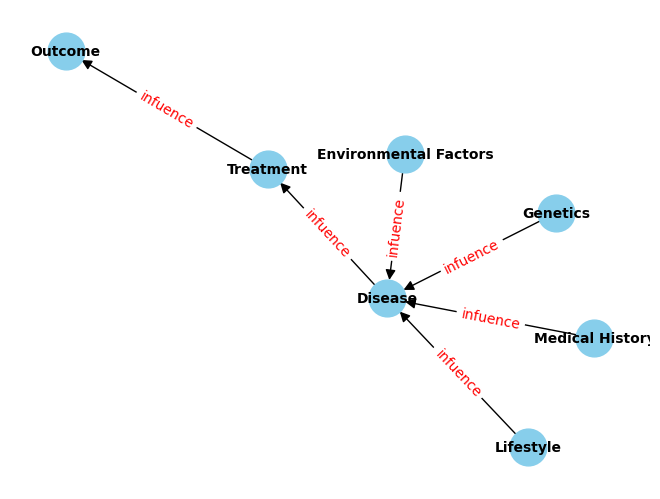

In [22]:
# Create a directed graph
G = nx.DiGraph()

# Add edges based on the Bayesian Network structure
G.add_edges_from(relations)

# Draw the graph
pos = nx.spring_layout(G)  # You can use other layout options
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrowsize=15)

# Add edge labels
edge_labels = {
    relation: 'infuence' for relation in relations
}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# Show the plot
plt.show()


In [2]:
# Etablissement de la structure
healthcare_model = BayesianNetwork(relations)

In [3]:
# Définition des relations
genetics_cpd = TabularCPD(
    variable='Genetics',
    variable_card=2,
    values=[[0.8], [0.2]]
)
lifestyle_cpd = TabularCPD(
    variable='Lifestyle',
    variable_card=2,
    values=[[0.7], [0.3]]
)
medical_history_cpd = TabularCPD(
    variable='Medical History',
    variable_card=2,
    values=[[0.6], [0.4]]
)
environmental_factors_cpd = TabularCPD(
    variable='Environmental Factors',
    variable_card=2,
    values=[[0.5], [0.5]]
)
disease_cpd = TabularCPD(
    variable='Disease',
    variable_card=2,
    values=[[0.1, 0.9, 0.8, 0.7, 0.3, 0.2, 0.1, 0.9, 0.8, 0.7, 0.3, 0.2, 0.1, 0.9, 0.8, 0.7],
            [0.9, 0.1, 0.2, 0.3, 0.7, 0.8, 0.9, 0.1, 0.2, 0.3, 0.7, 0.8, 0.9, 0.1, 0.2, 0.3]],
    evidence=['Genetics', 'Lifestyle', 'Medical History', 'Environmental Factors'],
    evidence_card=[2, 2, 2, 2]
)
treatment_cpd = TabularCPD(
    variable='Treatment',
    variable_card=2,
    values=[[0.8, 0.2],
            [0.2, 0.8]],
    evidence=['Disease'],
    evidence_card=[2]
)
outcome_cpd = TabularCPD(
    variable='Outcome',
    variable_card=2,
    values=[[0.9, 0.1],
            [0.1, 0.9]],
    evidence=['Treatment'],
    evidence_card=[2]
)

# On ajoute les relations à notre modèle
healthcare_model.add_cpds(genetics_cpd, lifestyle_cpd, medical_history_cpd,
                           environmental_factors_cpd, disease_cpd, treatment_cpd, outcome_cpd)

# Re-vérifier la structure de notre modèle
print(healthcare_model.get_cpds())

[<TabularCPD representing P(Genetics:2) at 0x23f4ea7a890>, <TabularCPD representing P(Lifestyle:2) at 0x23f4ea7b290>, <TabularCPD representing P(Medical History:2) at 0x23f4ea86210>, <TabularCPD representing P(Environmental Factors:2) at 0x23f4ea863d0>, <TabularCPD representing P(Disease:2 | Genetics:2, Lifestyle:2, Medical History:2, Environmental Factors:2) at 0x23f4ea86590>, <TabularCPD representing P(Treatment:2 | Disease:2) at 0x23f4d9a7c50>, <TabularCPD representing P(Outcome:2 | Treatment:2) at 0x23f4ea86cd0>]


In [4]:
#trouver les chemins des noeuds pour determiner qu'est ce qui donne des infos sur un noeud
print(healthcare_model.active_trail_nodes('Genetics'))
print(healthcare_model.active_trail_nodes('Lifestyle'))
print(healthcare_model.active_trail_nodes('Medical History'))
print(healthcare_model.active_trail_nodes('Environmental Factors'))
print(healthcare_model.active_trail_nodes('Disease'))
print(healthcare_model.active_trail_nodes('Treatment'))
print(healthcare_model.active_trail_nodes('Outcome'))

{'Genetics': {'Genetics', 'Disease', 'Outcome', 'Treatment'}}
{'Lifestyle': {'Lifestyle', 'Disease', 'Outcome', 'Treatment'}}
{'Medical History': {'Treatment', 'Disease', 'Outcome', 'Medical History'}}
{'Environmental Factors': {'Disease', 'Outcome', 'Environmental Factors', 'Treatment'}}
{'Disease': {'Disease', 'Genetics', 'Lifestyle', 'Medical History', 'Outcome', 'Environmental Factors', 'Treatment'}}
{'Treatment': {'Disease', 'Genetics', 'Lifestyle', 'Medical History', 'Outcome', 'Environmental Factors', 'Treatment'}}
{'Outcome': {'Disease', 'Genetics', 'Lifestyle', 'Medical History', 'Outcome', 'Environmental Factors', 'Treatment'}}


In [18]:
#determinaison des independances locales
print(healthcare_model.local_independencies('Genetics'))
print(healthcare_model.local_independencies('Lifestyle'))
print(healthcare_model.local_independencies('Medical History'))
print(healthcare_model.local_independencies('Environmental Factors'))
print(healthcare_model.local_independencies('Disease'))
print(healthcare_model.local_independencies('Treatment'))
print(healthcare_model.local_independencies('Outcome'))


print(healthcare_model.get_independencies())

(Genetics ⟂ Lifestyle, Environmental Factors, Medical History)
(Lifestyle ⟂ Genetics, Environmental Factors, Medical History)
(Medical History ⟂ Lifestyle, Genetics, Environmental Factors)
(Environmental Factors ⟂ Lifestyle, Genetics, Medical History)

(Treatment ⟂ Lifestyle, Genetics, Environmental Factors, Medical History | Disease)
(Outcome ⟂ Genetics, Disease, Lifestyle, Environmental Factors, Medical History | Treatment)
(Genetics ⟂ Lifestyle, Environmental Factors, Medical History)
(Genetics ⟂ Outcome, Treatment | Disease)
(Genetics ⟂ Environmental Factors, Medical History | Lifestyle)
(Genetics ⟂ Lifestyle, Environmental Factors | Medical History)
(Genetics ⟂ Lifestyle, Medical History | Environmental Factors)
(Genetics ⟂ Outcome | Treatment)
(Genetics ⟂ Outcome, Treatment | Lifestyle, Disease)
(Genetics ⟂ Outcome, Treatment | Disease, Medical History)
(Genetics ⟂ Treatment | Disease, Outcome)
(Genetics ⟂ Outcome, Treatment | Disease, Environmental Factors)
(Genetics ⟂ Outcome |

In [6]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(healthcare_model)
#calcul des proba existante pour vérifier que tout est correct
prob_disease = infer.query(variables=['Disease'])
print(prob_disease)

+------------+----------------+
| Disease    |   phi(Disease) |
+============+================+
| Disease(0) |         0.5330 |
+------------+----------------+
| Disease(1) |         0.4670 |
+------------+----------------+


In [9]:
prob_treatment= infer.query(variables=['Treatment'])
print(prob_treatment)

+--------------+------------------+
| Treatment    |   phi(Treatment) |
+==============+==================+
| Treatment(0) |           0.5198 |
+--------------+------------------+
| Treatment(1) |           0.4802 |
+--------------+------------------+


In [10]:
prob_outcome = infer.query(variables=['Outcome'])
print(prob_outcome)

+------------+----------------+
| Outcome    |   phi(Outcome) |
+============+================+
| Outcome(0) |         0.5158 |
+------------+----------------+
| Outcome(1) |         0.4842 |
+------------+----------------+


In [14]:
#probabilité de traitement sachant la maladie
prob_disease_given_treatment = infer.query(variables=['Treatment'], evidence={'Disease': 1})
print(prob_disease_given_treatment)

+--------------+------------------+
| Treatment    |   phi(Treatment) |
+==============+==================+
| Treatment(0) |           0.2000 |
+--------------+------------------+
| Treatment(1) |           0.8000 |
+--------------+------------------+


In [17]:
#probabilité de la condition de patient sachant la maladie
prob_disease_outcome_given_treatment = infer.query(variables=['Treatment', 'Outcome'], evidence={'Disease': 1})
print(prob_disease_outcome_given_treatment)

+--------------+------------+--------------------------+
| Treatment    | Outcome    |   phi(Treatment,Outcome) |
+==============+============+==========================+
| Treatment(0) | Outcome(0) |                   0.1800 |
+--------------+------------+--------------------------+
| Treatment(0) | Outcome(1) |                   0.0200 |
+--------------+------------+--------------------------+
| Treatment(1) | Outcome(0) |                   0.0800 |
+--------------+------------+--------------------------+
| Treatment(1) | Outcome(1) |                   0.7200 |
+--------------+------------+--------------------------+


# ETAPE3 : graphe à connexions multiples


# Financial Risk Assessment Bayesian Network

## Model Description:

The `financial_model` Bayesian Network models relationships between financial variables in the context of a simplified financial risk assessment. Let's break down the structure:

1. **Income (I):**
   - **Description:** Represents the individual's income.
   - **Influence on:** Expenses, Investment.
   - **Note:** The income level affects both expenses and investment decisions.

2. **Debt (D):**
   - **Description:** Represents the individual's debt.
   - **Influence on:** Expenses.
   - **Note:** The amount of debt influences the total expenses.

3. **Expenses (E):**
   - **Description:** Represents the individual's total expenses.
   - **Influence on:** Credit Score.
   - **Influenced by:** Income, Debt.
   - **Note:** Both income and debt influence the total expenses, and the total expenses, in turn, impact the credit score.

4. **Investment (Inv):**
   - **Description:** Represents the individual's investment decisions.
   - **Influence on:** Credit Score.
   - **Influenced by:** Income.
   - **Note:** Income influences investment decisions, which in turn impact the credit score.

5. **Credit Score (CS):**
   - **Description:** Represents the individual's credit score.
   - **Influenced by:** Expenses, Investment.
   - **Note:** Both total expenses and investment decisions jointly influence the credit score.

## Relationships:
- 'Income' and 'Debt' independently influence 'Expenses'.
- 'Income' influences 'Investment'.
- 'Expenses' and 'Investment' jointly influence 'Credit Score'.

## Explanation:
- The model suggests that an individual's income affects both their total expenses and investment decisions.
- The level of debt also influences total expenses.
- Both total expenses and investment decisions jointly impact the individual's credit score.
- This model allows you to understand how different financial variables interact and influence each other within the given context.

In practice, such a Bayesian Network could be used to make predictions or assessments related to financial risk based on observed or known values of some variables. The conditional dependencies and probabilities specified in the model provide a probabilistic framework for reasoning about the financial situation of an individual.


In [36]:
relations = [   
    ('Income', 'Expenses'),
    ('Debt', 'Expenses'),
    ('Income', 'Investment'),
    ('Expenses', 'Credit Score'),
    ('Investment', 'Credit Score')
    ]

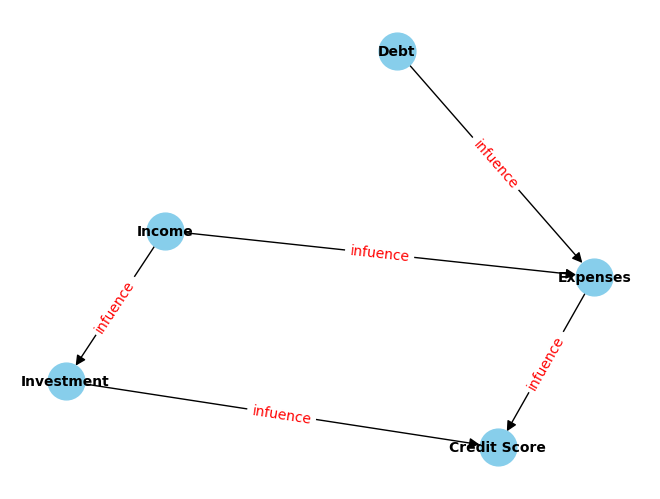

In [38]:
G = nx.DiGraph()

# Add edges based on the Bayesian Network structure
G.add_edges_from(relations)

# Draw the graph
pos = nx.spring_layout(G)  # You can use other layout options
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrowsize=15)

# Add edge labels
edge_labels = {
    relation: 'infuence' for relation in relations
}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# Show the plot
plt.show()

In [51]:
financial_model = BayesianNetwork([
    ('Income', 'Expenses'),
    ('Debt', 'Expenses'),
    ('Income', 'Investment'),
    ('Expenses', 'Credit Score'),
    ('Investment', 'Credit Score'),
])



In [52]:
# Defining the relationships
income_cpd = TabularCPD(
    variable='Income',
    variable_card=2,
    values=[[0.7], [0.3]]
)

debt_cpd = TabularCPD(
    variable='Debt',
    variable_card=2,
    values=[[0.8], [0.2]]
)

expenses_cpd = TabularCPD(
    variable='Expenses',
    variable_card=2,
    values=[[0.1, 0.9, 0.7, 0.3],
            [0.9, 0.1, 0.3, 0.7]],
    evidence=['Income', 'Debt'],
    evidence_card=[2, 2]
)

investment_cpd = TabularCPD(
    variable='Investment',
    variable_card=2,
    values=[[0.6, 0.4],
            [0.4, 0.6]],
    evidence=['Income'],
    evidence_card=[2]
)

credit_score_cpd = TabularCPD(
    variable='Credit Score',
    variable_card=2,
    values=[[0.9, 0.1, 0.3, 0.7],
            [0.1, 0.9, 0.7, 0.3]],
    evidence=['Expenses', 'Investment'],
    evidence_card=[2, 2]
)

# Adding relationships to the model
financial_model.add_cpds(income_cpd, debt_cpd, expenses_cpd, investment_cpd, credit_score_cpd)

# Checking the structure of the model
print(financial_model.get_cpds())

[<TabularCPD representing P(Income:2) at 0x23f541ddf10>, <TabularCPD representing P(Debt:2) at 0x23f541de010>, <TabularCPD representing P(Expenses:2 | Income:2, Debt:2) at 0x23f541df290>, <TabularCPD representing P(Investment:2 | Income:2) at 0x23f514b7890>, <TabularCPD representing P(Credit Score:2 | Expenses:2, Investment:2) at 0x23f540ccf90>]


In [53]:
#trouver les chemins des noeuds pour determiner qu'est ce qui donne des infos sur un noeud

print(financial_model.active_trail_nodes('Income'))
print(financial_model.active_trail_nodes('Debt'))
print(financial_model.active_trail_nodes('Expenses'))
print(financial_model.active_trail_nodes('Investment'))
print(financial_model.active_trail_nodes('Credit Score'))

{'Income': {'Expenses', 'Investment', 'Income', 'Credit Score'}}
{'Debt': {'Expenses', 'Debt', 'Credit Score'}}
{'Expenses': {'Expenses', 'Investment', 'Debt', 'Income', 'Credit Score'}}
{'Investment': {'Expenses', 'Investment', 'Income', 'Credit Score'}}
{'Credit Score': {'Expenses', 'Investment', 'Debt', 'Income', 'Credit Score'}}


In [54]:
#determinaison des independances locales
print(financial_model.local_independencies('Income'))
print(financial_model.local_independencies('Debt'))
print(financial_model.local_independencies('Expenses'))
print(financial_model.local_independencies('Investment'))
print(financial_model.local_independencies('Credit Score'))


print(financial_model.get_independencies())

(Income ⟂ Debt)
(Debt ⟂ Investment, Income)
(Expenses ⟂ Investment | Debt, Income)
(Investment ⟂ Expenses, Debt | Income)
(Credit Score ⟂ Debt, Income | Expenses, Investment)
(Expenses ⟂ Investment | Income)
(Expenses ⟂ Investment | Debt, Income)
(Investment ⟂ Debt)
(Investment ⟂ Expenses, Debt | Income)
(Investment ⟂ Debt | Expenses, Income)
(Investment ⟂ Expenses | Debt, Income)
(Investment ⟂ Debt | Expenses, Income, Credit Score)
(Debt ⟂ Investment, Income)
(Debt ⟂ Income | Investment)
(Debt ⟂ Investment | Income)
(Debt ⟂ Credit Score | Expenses, Investment)
(Debt ⟂ Investment, Credit Score | Expenses, Income)
(Debt ⟂ Credit Score | Expenses, Investment, Income)
(Debt ⟂ Investment | Expenses, Income, Credit Score)
(Income ⟂ Debt)
(Income ⟂ Debt | Investment)
(Income ⟂ Credit Score | Expenses, Investment)
(Income ⟂ Credit Score | Expenses, Investment, Debt)
(Credit Score ⟂ Debt, Income | Expenses, Investment)
(Credit Score ⟂ Debt | Expenses, Income)
(Credit Score ⟂ Income | Expenses,

In [55]:
financial_infer = VariableElimination(financial_model)

In [56]:
# probabilité de dettes
prob_debt = financial_infer.query(variables=['Debt'])
print(prob_debt)

+---------+-------------+
| Debt    |   phi(Debt) |
+=========+=============+
| Debt(0) |      0.8000 |
+---------+-------------+
| Debt(1) |      0.2000 |
+---------+-------------+


In [59]:
# probabilité de les revenus
prob_debt_given_income = financial_infer.query(variables=['Income'])
print(prob_debt_given_income)

+-----------+---------------+
| Income    |   phi(Income) |
+===========+===============+
| Income(0) |        0.7000 |
+-----------+---------------+
| Income(1) |        0.3000 |
+-----------+---------------+


In [66]:
# probabilité de les expenses
prob_debt_given_expenses = financial_infer.query(variables=['Expenses', 'Income', 'Debt'])
print(prob_debt_given_expenses)

+-------------+-----------+---------+-----------------------------+
| Expenses    | Income    | Debt    |   phi(Expenses,Income,Debt) |
+=============+===========+=========+=============================+
| Expenses(0) | Income(0) | Debt(0) |                      0.0560 |
+-------------+-----------+---------+-----------------------------+
| Expenses(0) | Income(0) | Debt(1) |                      0.1260 |
+-------------+-----------+---------+-----------------------------+
| Expenses(0) | Income(1) | Debt(0) |                      0.1680 |
+-------------+-----------+---------+-----------------------------+
| Expenses(0) | Income(1) | Debt(1) |                      0.0180 |
+-------------+-----------+---------+-----------------------------+
| Expenses(1) | Income(0) | Debt(0) |                      0.5040 |
+-------------+-----------+---------+-----------------------------+
| Expenses(1) | Income(0) | Debt(1) |                      0.0140 |
+-------------+-----------+---------+-----------

In [61]:
# probabilité des investissements
prob_investment = financial_infer.query(variables=['Investment'])
print(prob_investment)

+---------------+-------------------+
| Investment    |   phi(Investment) |
+===============+===================+
| Investment(0) |            0.5400 |
+---------------+-------------------+
| Investment(1) |            0.4600 |
+---------------+-------------------+


In [63]:
# probabilité des investissements sachant les revenus
prob_investment_given_income = financial_infer.query(variables=['Investment'], evidence={'Income': 1})
print(prob_investment_given_income)

+---------------+-------------------+
| Investment    |   phi(Investment) |
+===============+===================+
| Investment(0) |            0.4000 |
+---------------+-------------------+
| Investment(1) |            0.6000 |
+---------------+-------------------+


In [65]:
# probabilité des Credit Score sachant les revenus
prob_credit_score_given_income = financial_infer.query(variables=['Credit Score', 'Investment', 'Expenses'], evidence={'Income': 1})
print(prob_credit_score_given_income)

+-----------------+---------------+-------------+-----------------------------------------+
| Credit Score    | Investment    | Expenses    |   phi(Credit Score,Investment,Expenses) |
+=================+===============+=============+=========================================+
| Credit Score(0) | Investment(0) | Expenses(0) |                                  0.2232 |
+-----------------+---------------+-------------+-----------------------------------------+
| Credit Score(0) | Investment(0) | Expenses(1) |                                  0.0456 |
+-----------------+---------------+-------------+-----------------------------------------+
| Credit Score(0) | Investment(1) | Expenses(0) |                                  0.0372 |
+-----------------+---------------+-------------+-----------------------------------------+
| Credit Score(0) | Investment(1) | Expenses(1) |                                  0.1596 |
+-----------------+---------------+-------------+-------------------------------